# Análisis Temporal
Este notebook tiene como objetivo analizar cómo diferentes métricas relacionadas con la atención médica han evolucionado a lo largo del tiempo.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Configuración global de gráficos
sns.set(style="whitegrid")

In [4]:
%load_ext kedro.ipython

[08/30/23 18:36:04] INFO     Resolved project path as: c:\Users\Pablo                               __init__.py:136
                             Villar\Desktop\CURSOS\KSchool\Máster en Data                                          
                             Science\TFM\nuevo_entorno_kedro\hado.                                                 
                             To set a different path, run '%reload_kedro <project_root>'                           

[08/30/23 18:36:04] WARNING  C:\Users\Pablo                                                         warnings.py:109
                             Villar\AppData\Local\Programs\Python\Python310\lib\importlib\__init__.                
                             py:126: DeprecationWarning: `kedro.extras.datasets` is deprecated and                 
                             will be removed in Kedro 0.19, install `kedro-datasets` instead by                    
                             running `pip install kedro-datasets`.                                                 
                               return _bootstrap._gcd_import(name[level:], package, level)                         
                                                                                                                   

[08/30/23 18:36:06] INFO     Kedro project hado                                                     __init__.py:105

                    INFO     Defined global variable 'context', 'session', 'catalog' and            __init__.py:106
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        __init__.py:112

In [5]:
# Cargamos los datos
df = catalog.load('hado_final')

                    INFO     Loading data from 'hado_final' (CSVDataSet)...                     data_catalog.py:345

Steps:

1. **Contar el número de casos por año**: Esto podría ayudar a entender si la cantidad de casos en el dataset está aumentando o disminuyendo con el tiempo.
   
2. **Suma de variables numéricas por año**: Podemos realizar el sumatorio distintas métricas (como número de visitas, estancias, etc.) para cada año y ver si hay alguna tendencia.

3. **Distribución de categorías por año**: Podemos ver cómo la distribución de ciertas categorías (como tipos de diagnóstico, procedencia, etc.) cambia con el tiempo.

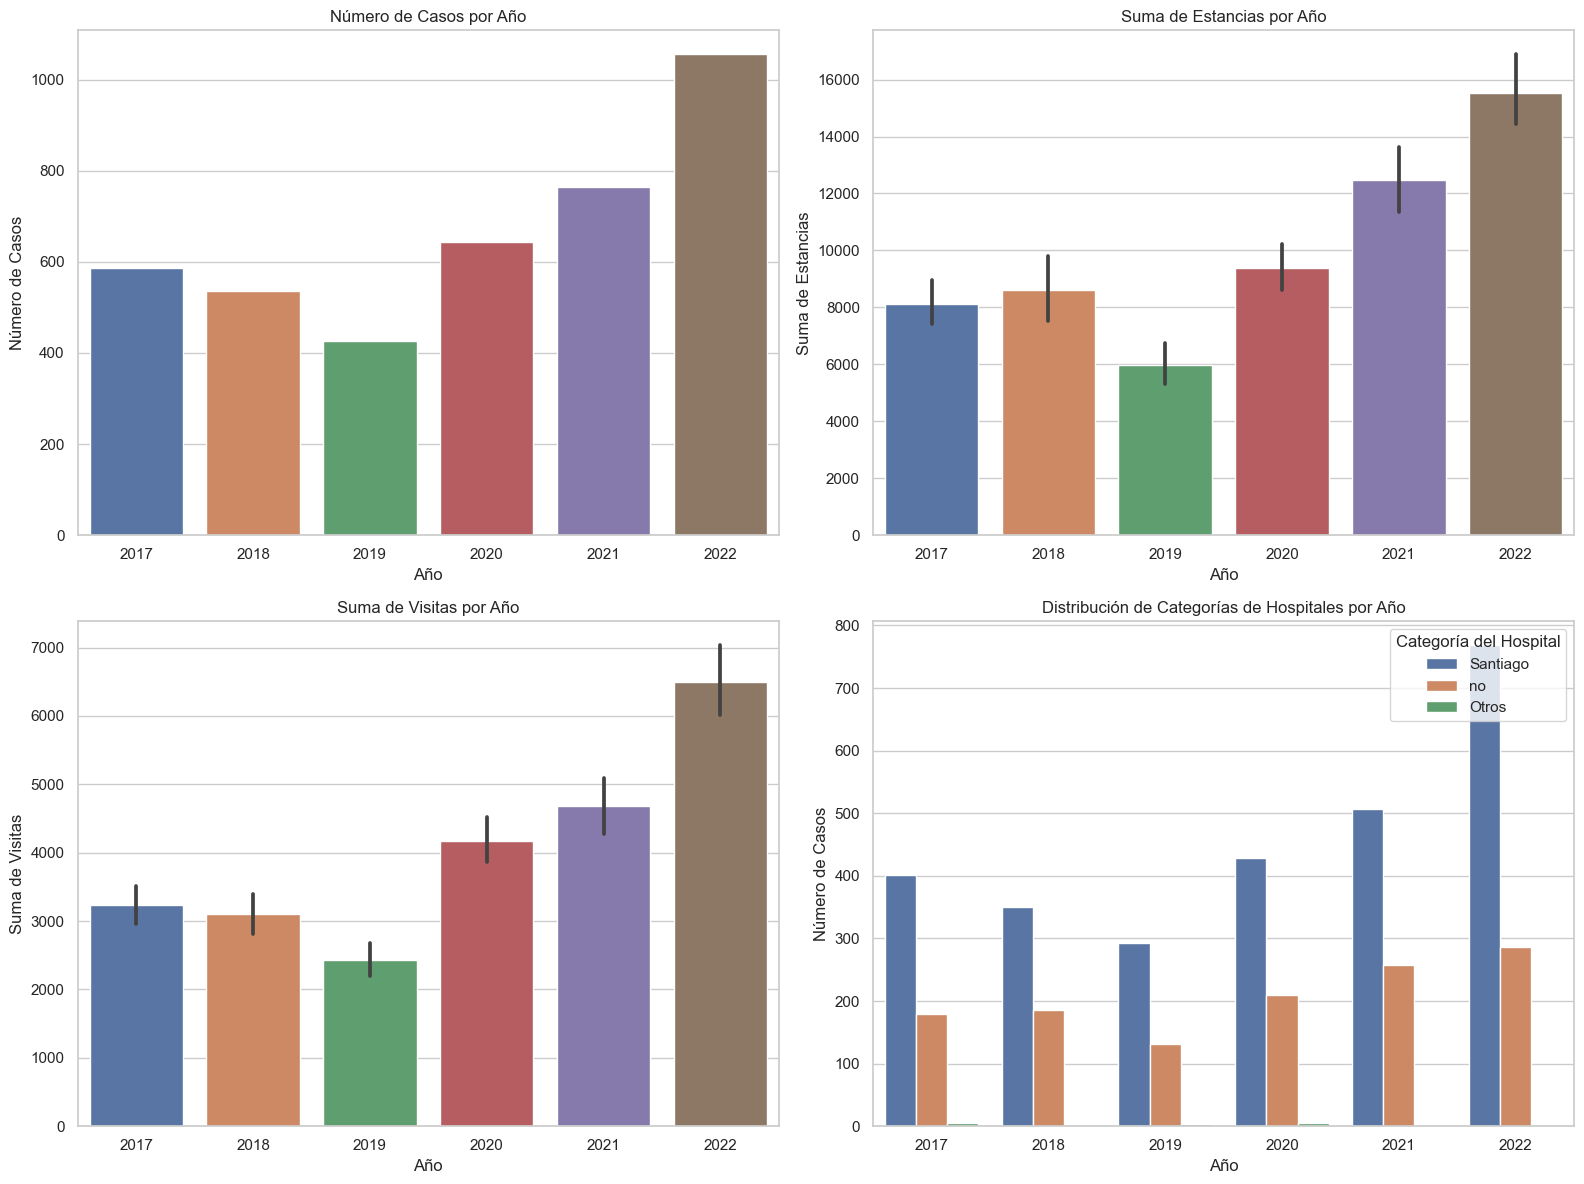

In [6]:
# Create subplots
fig, ax = plt.subplots(2, 2, figsize=(16, 12))

# Plotting the number of cases per year
sns.countplot(data=df, x='year', ax=ax[0, 0])
ax[0, 0].set_title('Número de Casos por Año')
ax[0, 0].set_xlabel('Año')
ax[0, 0].set_ylabel('Número de Casos')

# Plotting the average number of stays per year
sns.barplot(data=df, x='year', y='n_estancias', ax=ax[0, 1], estimator=sum)
ax[0, 1].set_title('Suma de Estancias por Año')
ax[0, 1].set_xlabel('Año')
ax[0, 1].set_ylabel('Suma de Estancias')

# Plotting the average number of visits per year
sns.barplot(data=df, x='year', y='n_visitas', ax=ax[1, 0], estimator=sum)
ax[1, 0].set_title('Suma de Visitas por Año')
ax[1, 0].set_xlabel('Año')
ax[1, 0].set_ylabel('Suma de Visitas')

# Plotting the distribution of hospital categories over years
sns.countplot(data=df, x='year', hue='hospital_category', ax=ax[1, 1])
ax[1, 1].set_title('Distribución de Categorías de Hospitales por Año')
ax[1, 1].set_xlabel('Año')
ax[1, 1].set_ylabel('Número de Casos')
ax[1, 1].legend(title='Categoría del Hospital', loc='upper right')

# Show the plots
plt.tight_layout()
plt.show()


1. **Número de Casos por Año**: El primer gráfico muestra que el número de casos parece estar aumentando con el tiempo, lo que podría indicar una mayor demanda de los servicios hospitalarios o simplemente una mejor recopilación de datos con el tiempo.

2. **Suma de Estancias por Año**: El segundo gráfico muestra la suma total de estancias por año. Podemos ver que hay un incremento en la suma de estancias, lo cual está alineado con el aumento en el número de casos.

3. **Suma de Visitas por Año**: El tercer gráfico también muestra un aumento en la suma de visitas por año, lo que sugiere un aumento en la interacción de los pacientes con el hospital.

4. **Distribución de Categorías de Hospitales por Año**: El cuarto gráfico muestra cómo varía la distribución de las categorías de hospitales con el tiempo. Aquí es importante notar que la categoría "No" (probablemente indicando datos faltantes o casos no asignados a un hospital específico) parece disminuir con el tiempo.

### **Insights**:
* El aumento en el número de casos, estancias y visitas podría indicar una mayor carga de trabajo para el hospital, lo cual es importante para la asignación de recursos.

* La disminución en la categoría "No" para los hospitales podría indicar mejoras en la calidad de los datos o en los procedimientos de asignación de pacientes a hospitales.

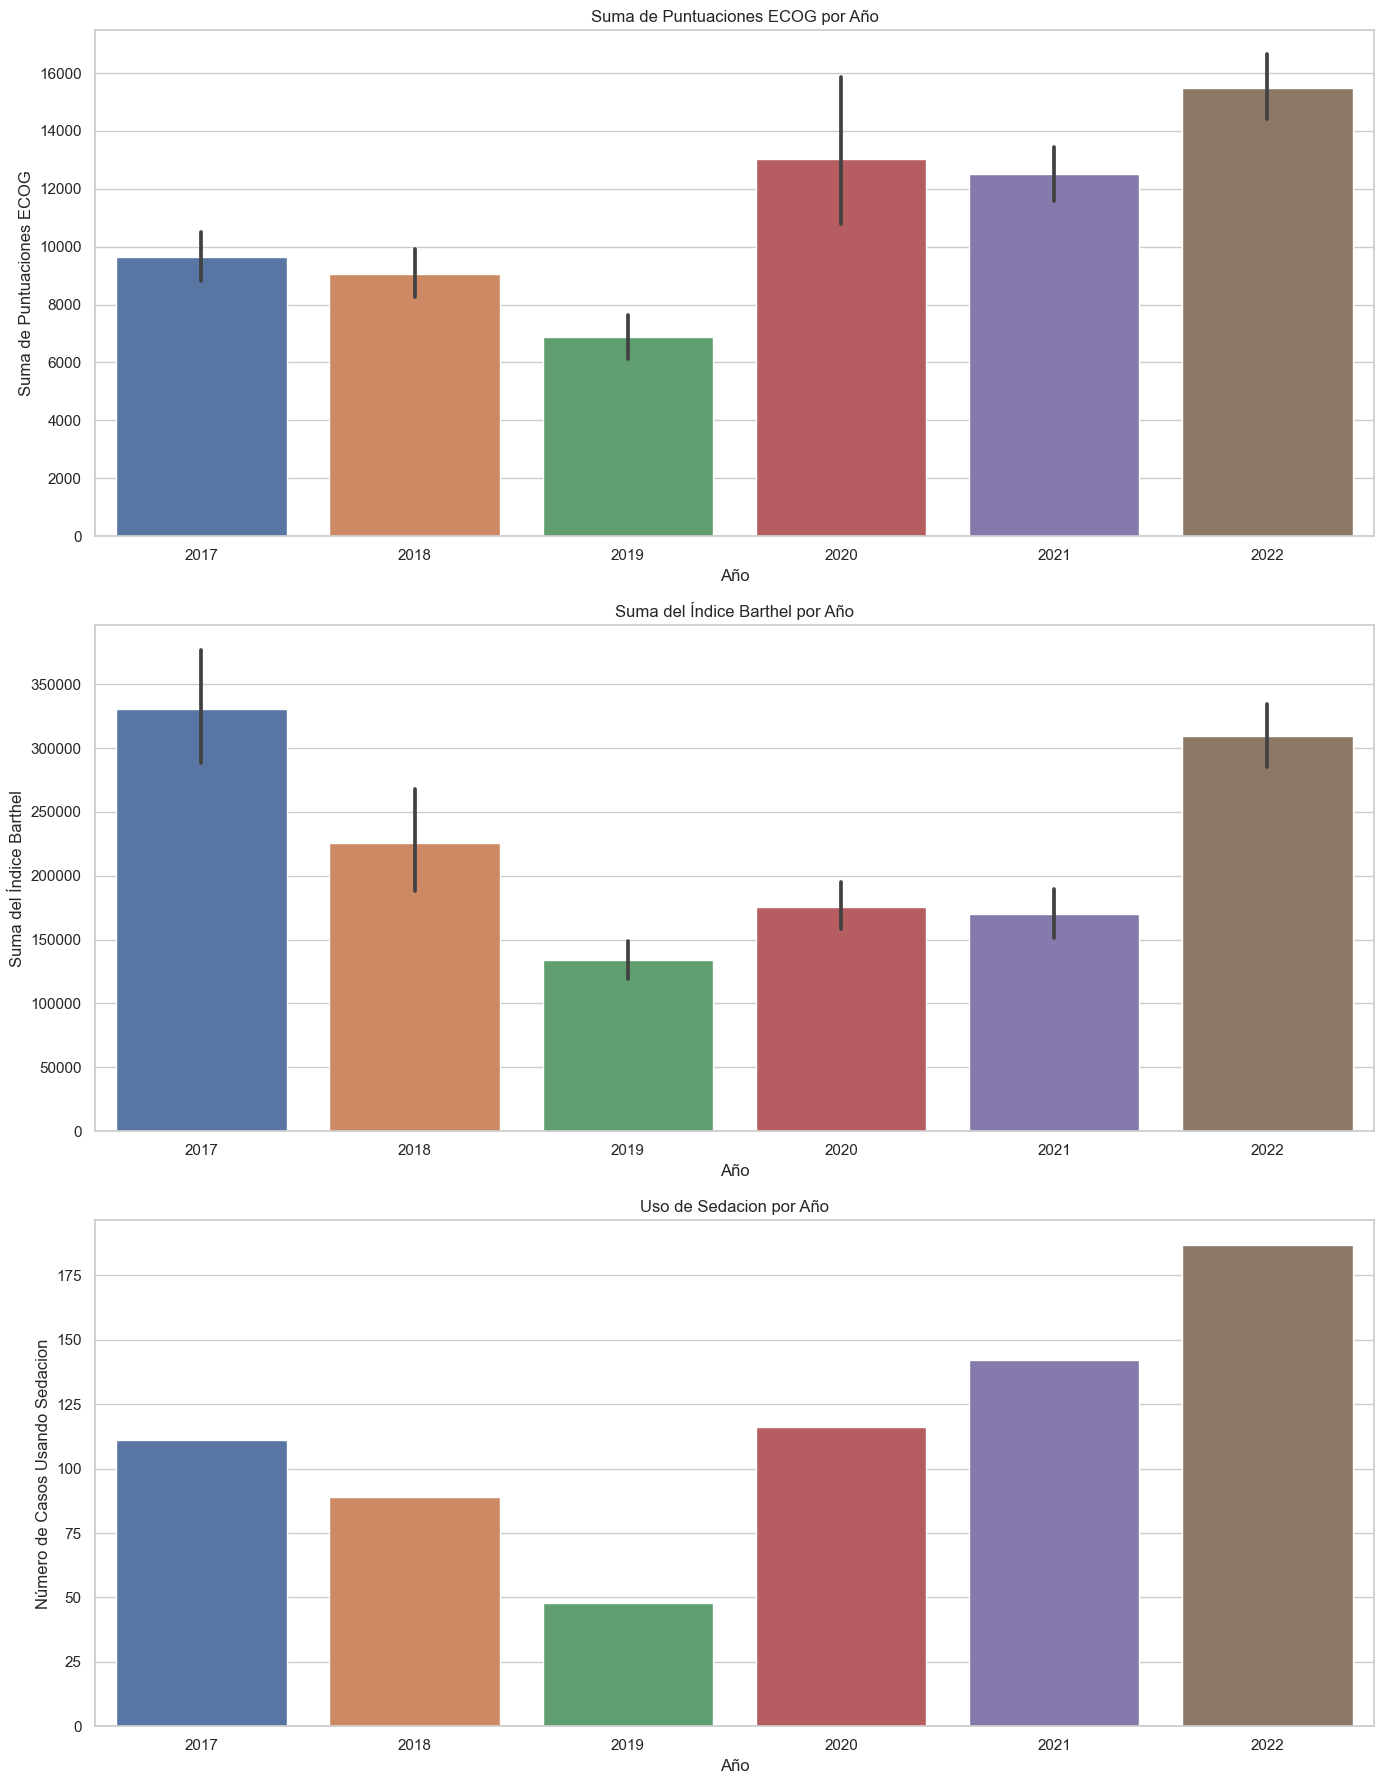

In [7]:
# Create subplots for additional temporal analysis
fig, ax = plt.subplots(3, 1, figsize=(14, 18))

# Plotting the average ECOG score per year
sns.barplot(data=df, x='year', y='ps_ecog', ax=ax[0], estimator=sum)
ax[0].set_title('Suma de Puntuaciones ECOG por Año')
ax[0].set_xlabel('Año')
ax[0].set_ylabel('Suma de Puntuaciones ECOG')

# Plotting the average Barthel Index per year
sns.barplot(data=df, x='year', y='barthel', ax=ax[1], estimator=sum)
ax[1].set_title('Suma del Índice Barthel por Año')
ax[1].set_xlabel('Año')
ax[1].set_ylabel('Suma del Índice Barthel')

# Plotting the usage of medication (Morphine) per year
sns.countplot(data=df[df['tiene_sedacion'] == 1], x='year', ax=ax[2])
ax[2].set_title('Uso de Sedacion por Año')
ax[2].set_xlabel('Año')
ax[2].set_ylabel('Número de Casos Usando Sedacion')

# Show the plots
plt.tight_layout()
plt.show()


1. **Suma de Puntuaciones ECOG por Año**: El primer gráfico muestra la suma de las puntuaciones ECOG (Eastern Cooperative Oncology Group Performance Status) por año. Hay un aumento en la suma de estas puntuaciones, lo cual podría indicar un cambio en la gravedad de las condiciones de los pacientes o simplemente un aumento en el número de pacientes.

2. **Suma del Índice Barthel por Año**: El segundo gráfico muestra la suma del Índice Barthel por año. Al igual que con ECOG, hay un aumento en la suma del índice Barthel, lo que podría relacionarse con el aumento en el número de casos.

3. **Uso de sedacion por Año**: El tercer gráfico muestra el número de casos que usaron sedacion cada año. Podemos ver una tendencia ascendente, lo que podría tener implicaciones en la gestión del dolor o en el tipo de condiciones que el hospital está tratando.

### **Insights Adicionales**:
* El aumento en las métricas de salud como ECOG y Barthel podría requerir una revisión más detallada para entender si estos cambios son debido a un cambio en la gravedad de las condiciones de los pacientes o simplemente un aumento en el número de pacientes.

* El aumento en el uso de sedacion podría ser una señal para investigar más a fondo las políticas de manejo del dolor en el hospital.

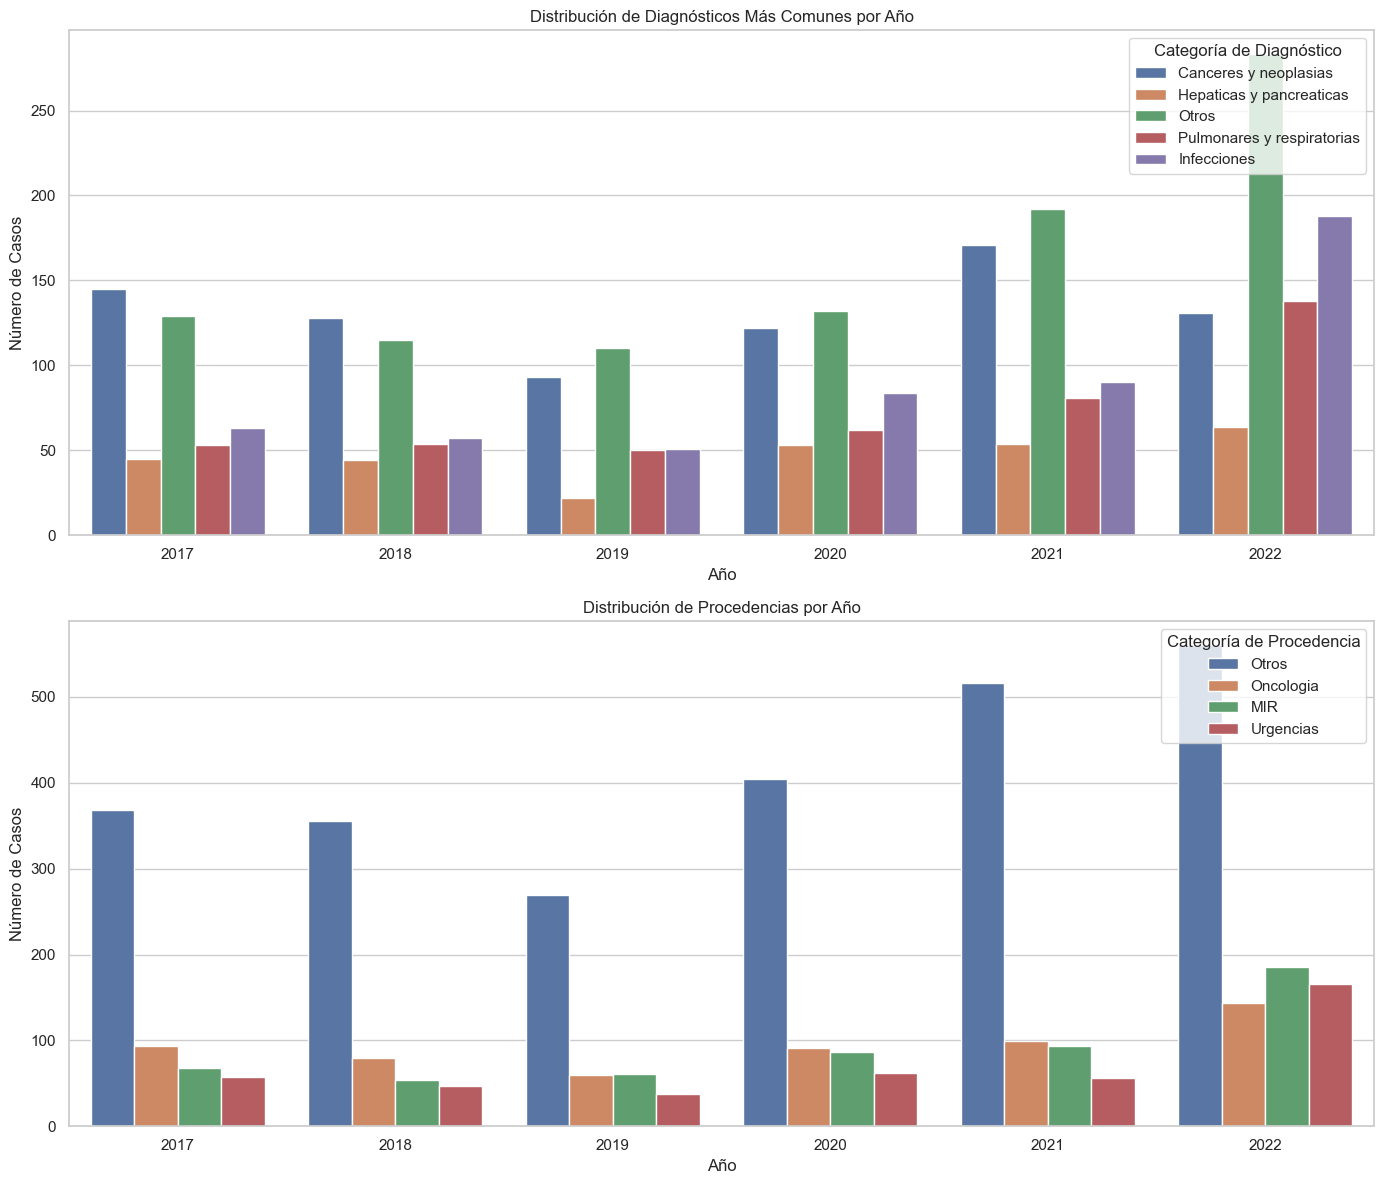

In [8]:
# Create subplots for further temporal analysis
fig, ax = plt.subplots(2, 1, figsize=(14, 12))

# Plotting the distribution of most common diagnoses per year
top_diagnoses = df['diagnosis_category'].value_counts().index[:5]
filtered_data = df[df['diagnosis_category'].isin(top_diagnoses)]
sns.countplot(data=filtered_data, x='year', hue='diagnosis_category', ax=ax[0])
ax[0].set_title('Distribución de Diagnósticos Más Comunes por Año')
ax[0].set_xlabel('Año')
ax[0].set_ylabel('Número de Casos')
ax[0].legend(title='Categoría de Diagnóstico', loc='upper right')

# Plotting the distribution of patient origin per year
sns.countplot(data=df, x='year', hue='procedencia_category', ax=ax[1])
ax[1].set_title('Distribución de Procedencias por Año')
ax[1].set_xlabel('Año')
ax[1].set_ylabel('Número de Casos')
ax[1].legend(title='Categoría de Procedencia', loc='upper right')

# Show the plots
plt.tight_layout()
plt.show()


1. **Distribución de Diagnósticos Más Comunes por Año**: El primer gráfico muestra cómo se distribuyen los diagnósticos más comunes a lo largo de los años. Parece que ciertos diagnósticos han tenido un aumento notable en los últimos años, lo cual podría tener implicaciones importantes para el tratamiento y la asignación de recursos en el hospital.

2. **Distribución de Procedencias por Año**: El segundo gráfico muestra cómo la procedencia de los pacientes ha cambiado con el tiempo. Podemos ver que la categoría "Otro" ha aumentado notablemente, lo que podría sugerir cambios en la forma en que los pacientes son referidos al hospital o ingresan en él.

### **Insights Adicionales**:
* El aumento en ciertos diagnósticos podría ser una señal para investigar más a fondo si estas condiciones están efectivamente en aumento o si se trata de un cambio en los procedimientos de diagnóstico.

* El cambio en la procedencia de los pacientes podría tener varias explicaciones, desde cambios en las políticas de referencia hasta cambios en la población que el hospital atiende.

>Estos son solo algunos de los análisis temporales que podríamos realizar. La idea es usar estos insights como un punto de partida para investigaciones más profundas, que podrían incluir estudios de causalidad, pruebas de hipótesis, etc...

## Análisis de Tendencia

In [11]:
# Tendencia temporal en el número de pacientes
yearly_trend = df['year'].value_counts().sort_index()
yearly_trend

2017     587
2018     536
2019     427
2020     643
2021     765
2022    1055
Name: year, dtype: int64

In [84]:
# Agrupar los datos por año y contar el número de ingresos
trend_data = df.groupby('year')['ingreso_category'].count().reset_index()

# Filtrar el DataFrame para que solo contenga registros donde 'alta_category' es 'Exitus'
filtered_df = df[df['alta_category'] == 'Exitus']
trend_data_alta = filtered_df.groupby('year')['alta_category'].count().reset_index()

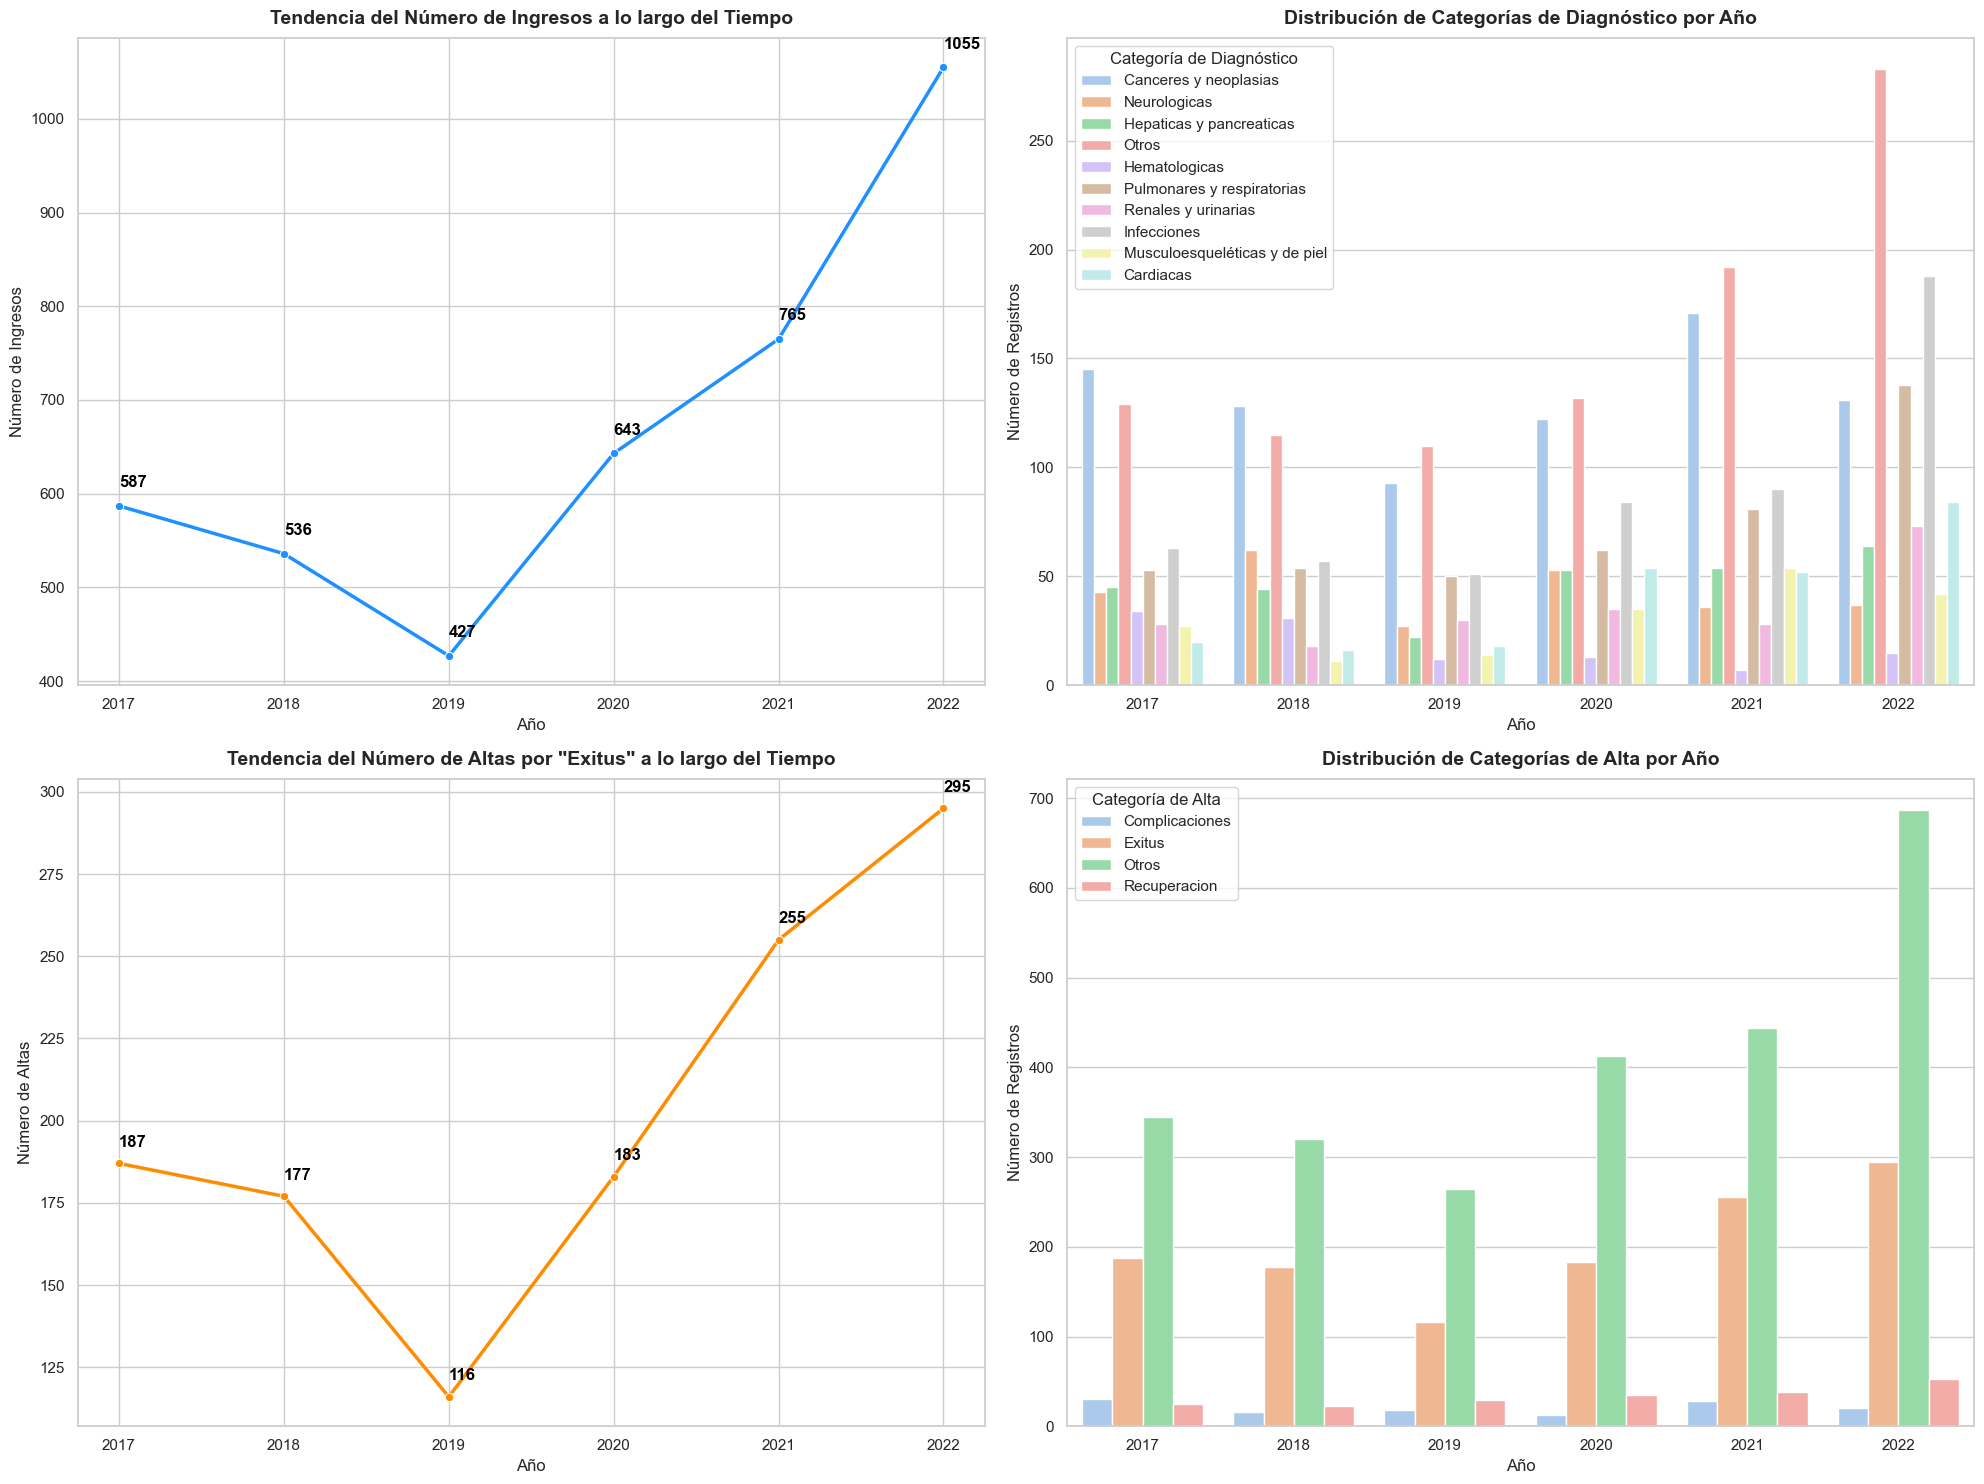

In [112]:
# Crear el gráfico de líneas para mostrar la tendencia a lo largo del tiempo
plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
ax1 = sns.lineplot(x='year', y='ingreso_category', data=trend_data, marker='o', color="dodgerblue", linewidth=2.5)
plt.title('Tendencia del Número de Ingresos a lo largo del Tiempo', fontsize=14, fontweight='semibold', pad=10)
plt.xlabel('Año')
plt.ylabel('Número de Ingresos')
for index, value in trend_data['ingreso_category'].items():
    ax1.text(trend_data['year'][index], value + 20, str(value), color='black', fontweight='bold')

# Distribución de categorías de diagnóstico a lo largo de los años
plt.subplot(2, 2, 2)
ax3 = sns.countplot(data=df, x='year', hue='diagnosis_category', palette='pastel')
plt.title('Distribución de Categorías de Diagnóstico por Año', fontsize=14, fontweight='semibold', pad=10)
plt.xlabel('Año')
plt.ylabel('Número de Registros')
plt.legend(title='Categoría de Diagnóstico', loc='best')


plt.subplot(2,2,3)
ax2 = sns.lineplot(x='year', y='alta_category', data=trend_data_alta, marker='o', color="darkorange", linewidth=2.5)
plt.title('Tendencia del Número de Altas por "Exitus" a lo largo del Tiempo', fontsize=14, fontweight='semibold', pad=10)
plt.xlabel('Año')
plt.ylabel('Número de Altas')
for index, value in trend_data_alta['alta_category'].items():
    ax2.text(trend_data_alta['year'][index], value + 5, str(value), color='black', fontweight='bold')

# Distribución de categorías de diagnóstico a lo largo de los años
plt.subplot(2, 2, 4)
ax4 = sns.countplot(data=df, x='year', hue='alta_category', palette='pastel')
plt.title('Distribución de Categorías de Alta por Año', fontsize=14, fontweight='semibold', pad=10)
plt.xlabel('Año')
plt.ylabel('Número de Registros')
plt.legend(title='Categoría de Alta', loc='best')

plt.tight_layout()
plt.show()

## Heatmap

[08/30/23 18:36:09] WARNING  C:\Users\Pablo                                                         warnings.py:109
                             Villar\AppData\Local\Temp\ipykernel_28028\2705727471.py:5:                            
                             FutureWarning: In a future version of pandas all arguments of                         
                             DataFrame.pivot will be keyword-only.                                                 
                               heatmap_pivot = heatmap_data.pivot("year", "diagnosis_category",                    
                             "ingreso_category")                                                                   
                                                                                                                   

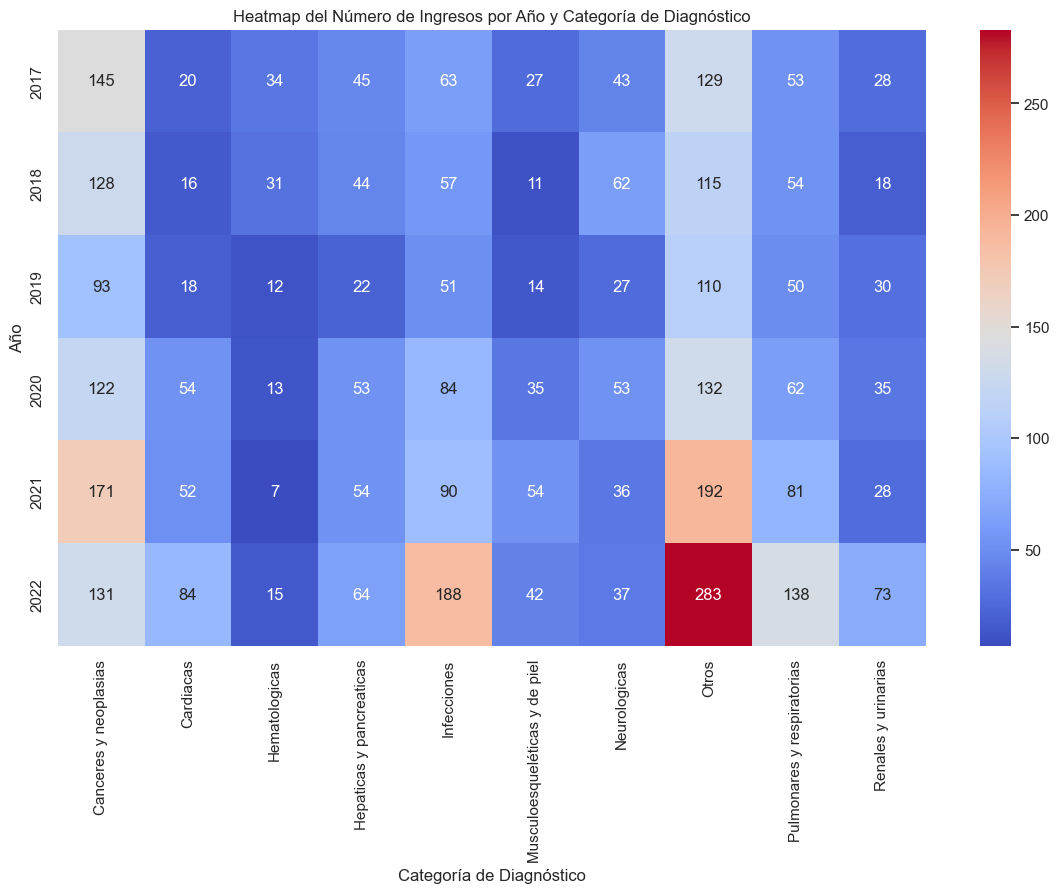

In [10]:
# Agrupar los datos por año y diagnosis_category y contar el número de ingresos
heatmap_data = df.groupby(['year', 'diagnosis_category'])['ingreso_category'].count().reset_index()

# Crear una tabla pivot para el heatmap
heatmap_pivot = heatmap_data.pivot("year", "diagnosis_category", "ingreso_category")

# Crear el heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_pivot, annot=True, fmt=".0f", cmap="coolwarm")
plt.title('Heatmap del Número de Ingresos por Año y Categoría de Diagnóstico')
plt.xlabel('Categoría de Diagnóstico')
plt.ylabel('Año')
plt.show()


## Investigaciones Más Profundas:
1. **Estudios Longitudinales**: Si los datos lo permiten, podrías hacer un seguimiento de los mismos pacientes a lo largo del tiempo para entender mejor las trayectorias de las enfermedades y los resultados del tratamiento.

2. **Análisis de Cohortes**: Podrías segmentar a los pacientes en diferentes cohortes (por ejemplo, basadas en diagnóstico, edad, género, etc.) y analizar cómo diferentes factores afectan a cada cohorte a lo largo del tiempo.

3. **Comparación de Políticas de Tratamiento**: Si hay datos disponibles sobre diferentes políticas de tratamiento o protocolos implementados en diferentes momentos, podrías comparar sus efectos.

## Estudios de Causalidad:
1. **Pruebas de Hipótesis**: Podrías utilizar pruebas estadísticas para evaluar si los cambios observados en diferentes variables son estadísticamente significativos o si podrían haber ocurrido por casualidad.

2. **Modelos de Regresión**: Los modelos de regresión pueden ajustarse para evaluar el efecto de una variable (como una política de tratamiento) en otra (como tasas de mortalidad), controlando por otras variables.

3. **Métodos de Series Temporales**: Técnicas como modelos ARIMA o modelos de estado-espacio pueden ser útiles para evaluar la causalidad en datos temporales.

4. **Métodos de Tratamiento Sintético**: Este es un enfoque más avanzado que crea un grupo de control sintético para comparar contra un grupo de tratamiento, especialmente útil para evaluar el impacto de políticas o tratamientos.

5. **Diseño Experimental**: Si es posible, la forma más definitiva de establecer la causalidad es a través de un diseño experimental, como un ensayo controlado aleatorio (ECA).

6. **Modelos de Causalidad de Rubin o Diagramas de Judea Pearl**: Estos son modelos más teóricos que intentan capturar la estructura causal subyacente entre diferentes variables.

>Para realizar estudios de causalidad, es crucial tener un buen entendimiento tanto de las técnicas estadísticas como del dominio específico (en este caso, la atención médica), para asegurarse de que los modelos sean tanto matemáticamente sólidos como clínicamente relevantes.